In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = sns.load_dataset('flights')

In [4]:
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [12]:
data['YearMonth'] = pd.to_datetime("01-"+ data['month'].astype(str)+ "-"+data['year'].astype(str))
data.set_index('YearMonth',inplace=True)
data.head()


,year,month,passengers
YearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='YearMonth', ylabel='passengers'>

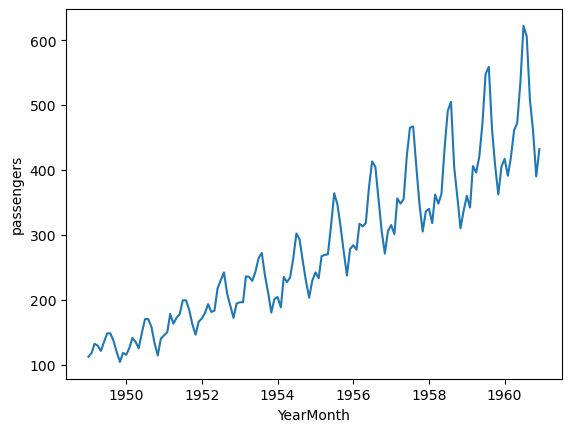

In [16]:
sns.lineplot(data=data,x=data.index,y=data.passengers)

In [17]:
 data['rollmean'] = data.passengers.rolling(window=12).mean()
 data['rollstd'] = data.passengers.rolling(window=12).std()

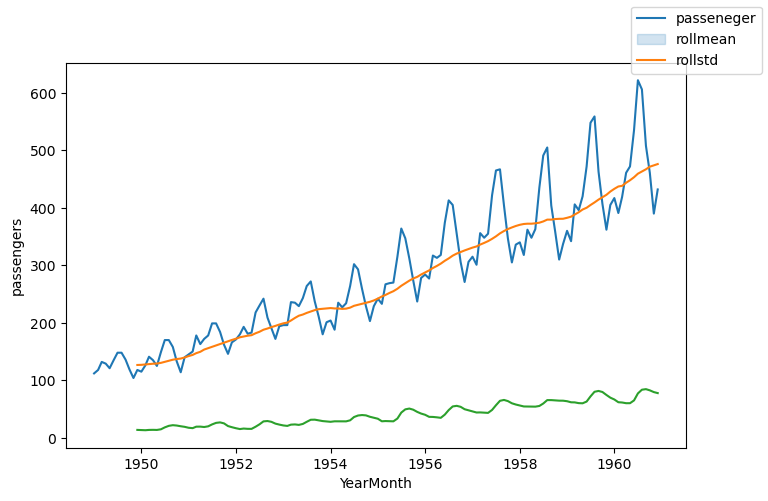

In [22]:
fig = plt.figure(figsize=(8,5))
sns.lineplot(data=data,x=data.index,y=data.passengers)
sns.lineplot(data=data,x=data.index,y=data.rollmean)
sns.lineplot(data=data,x=data.index,y=data.rollstd)
fig.legend(labels=['passeneger','rollmean','rollstd'])
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['passengers'], autolag='AIC')
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [34]:
stats = pd.Series(result[0:4],index=['Text Statistic','p-value','flags used','number of observation used'])
stats

Text Statistic                  0.815369
p-value                         0.991880
flags used                     13.000000
number of observation used    130.000000
dtype: float64

In [40]:
for keys,values in result[4].items():
    print('critically',keys,':',values)

critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
hello
critically 10% : -2.578770059171598


In [92]:
def test_stationary(dataframe,val):
    dataframe['rollmean'] = dataframe[val].rolling(window=12).mean()
    dataframe['rollstd'] = dataframe[val].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(dataframe[val], autolag='AIC')
    stats = pd.Series(result[0:4],index=['Text Statistic','p-value','flags used','number of observation used'])
    print(stats)
    
    for keys,values in result[4].items():
        print('critically',keys,':',values)

    sns.lineplot(data=dataframe,x = dataframe.index,y=val)
    sns.lineplot(data=dataframe,x = dataframe.index,y='rollmean')
    sns.lineplot(data=dataframe,x = dataframe.index,y='rollstd')
    

(0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


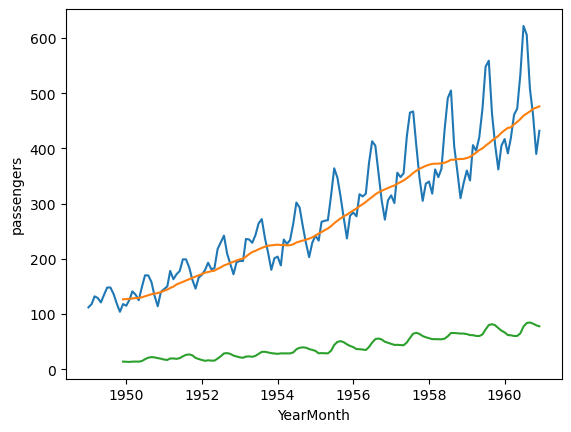

In [53]:
test_stationary(data,'passengers')

In [65]:
air_df = data.passengers
air_df = pd.DataFrame(air_df)
air_df.head()

,passengers
YearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [84]:
air_df['shift'] = data.passengers.shift()
air_df.head()

,passengers,shift
YearMonth,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


In [85]:
air_df['shifdif'] = air_df['passengers'] - air_df['shift']

In [86]:
air_df.head()

,passengers,shift,shifdif
YearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Text Statistic                 -2.829267
p-value                         0.054213
flags used                     12.000000
number of observation used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


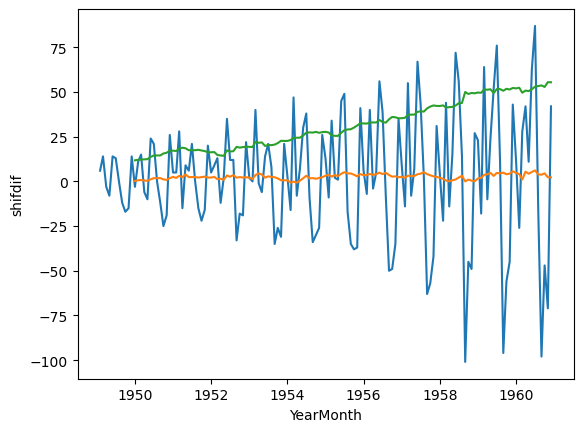

In [100]:
test_stationary(air_df.dropna(),'shifdif')

In [103]:
log_df = data[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

,passengers,log
YearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Text Statistic                 -1.717017
p-value                         0.422367
flags used                     13.000000
number of observation used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


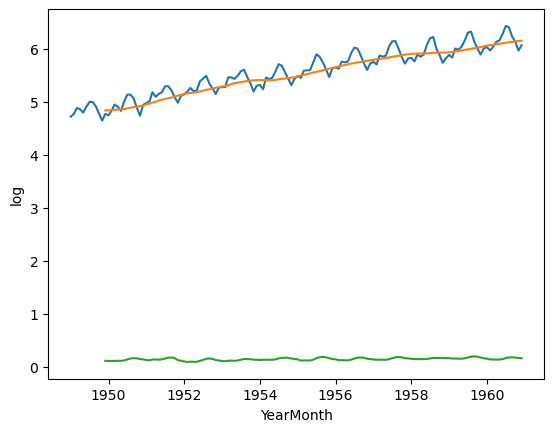

In [93]:
test_stationary(log_df,'log')

In [96]:
sqrt_df = data[['passengers']]
sqrt_df['sqrt'] = np.sqrt(log_df['passengers'])
sqrt_df.head()

,passengers,sqrt
YearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


Text Statistic                 -0.345854
p-value                         0.918754
flags used                     13.000000
number of observation used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


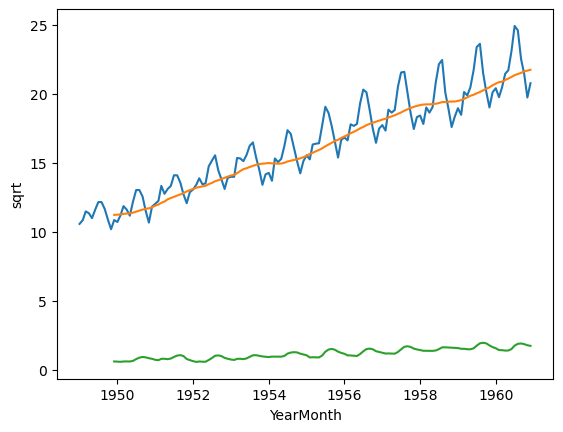

In [97]:
test_stationary(sqrt_df,'sqrt')

Text Statistic                 -0.345854
p-value                         0.918754
flags used                     13.000000
number of observation used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


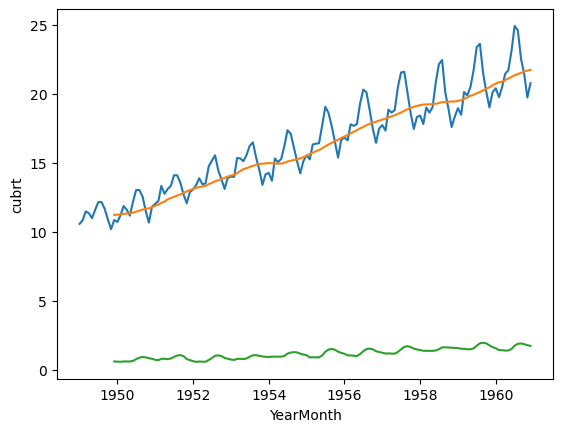

In [99]:
cubrt_df = data[['passengers']]
cubrt_df['cubrt'] = np.sqrt(log_df['passengers'])
test_stationary(cubrt_df,'cubrt')

Text Statistic                 -3.186422
p-value                         0.020784
flags used                     12.000000
number of observation used    130.000000
dtype: float64
critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


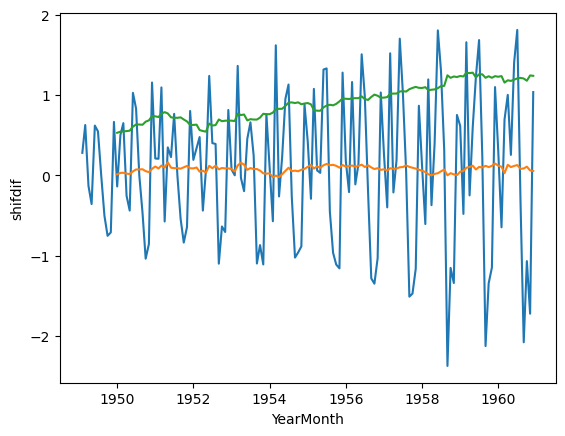

In [113]:
log_df2 = log_df[['passengers','log']]
log_df2['logsqrt'] = np.sqrt(log_df['passengers'])
log_df2['shifdif'] = log_df2['logsqrt'] - log_df2['logsqrt'].shift()
log_df2.head()
test_stationary(log_df2.dropna(),'shifdif')

**Next - 2**

In [114]:
airp = data[['passengers']].copy(deep=True)
airp['firstDif'] = airp['passengers'].diff()
airp['firstDif2'] = airp['passengers'].diff(12)
airp.head()

,passengers,firstDif,firstDif2
YearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


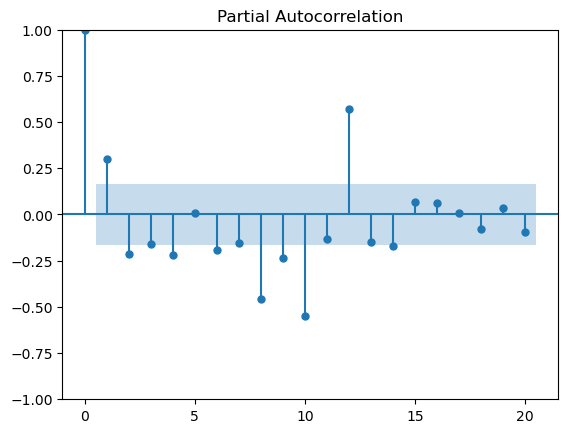

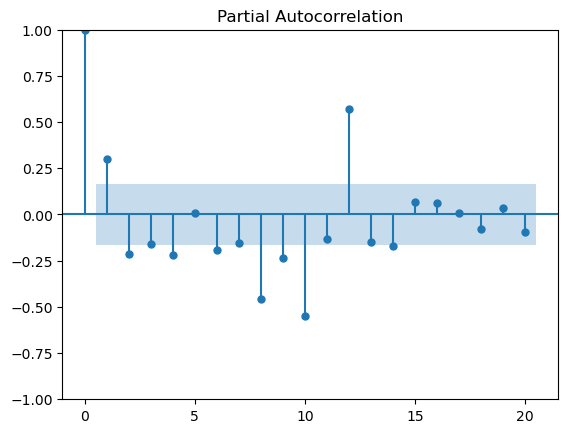

In [116]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(airp['firstDif'].dropna(),lags=20)
# arima = ARIMA(airp['passengers'],order)

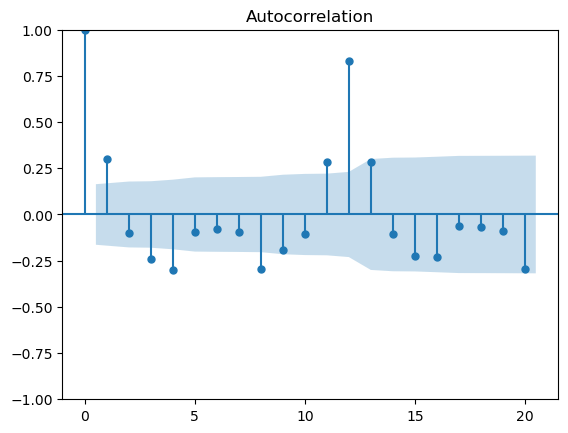

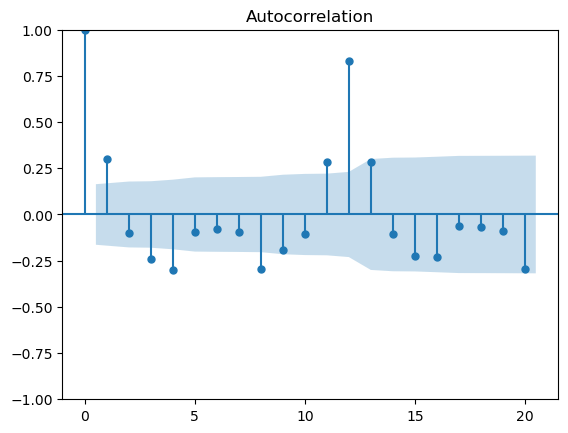

In [117]:
plot_acf(airp['firstDif'].dropna(),lags=20)

In [120]:
from sklearn.model_selection import train_test_split
train = airp[:round(len(airp)*70/100)]
test = airp[round(len(airp)*70/100):]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediaction = model_fit.predict(start=test.index[0],end =test.index[-1])
airp['prediication'] = prediaction

In [125]:
airp.tail()

,passengers,firstDif,firstDif2,prediication
YearMonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='YearMonth', ylabel='passengers'>

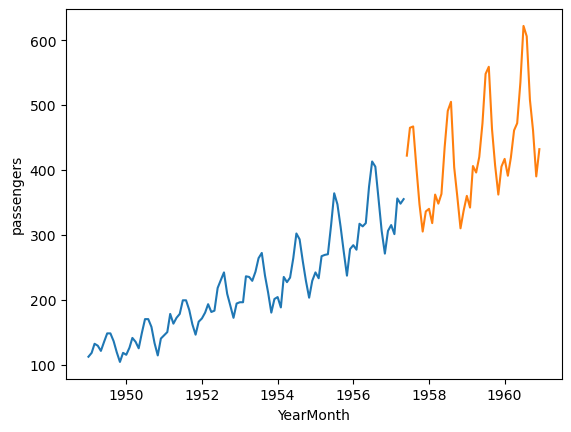

In [127]:
sns.lineplot(data=train,x=train.index,y='passengers')
sns.lineplot(data=test,x=test.index,y='passengers')

<Axes: xlabel='YearMonth', ylabel='passengers'>

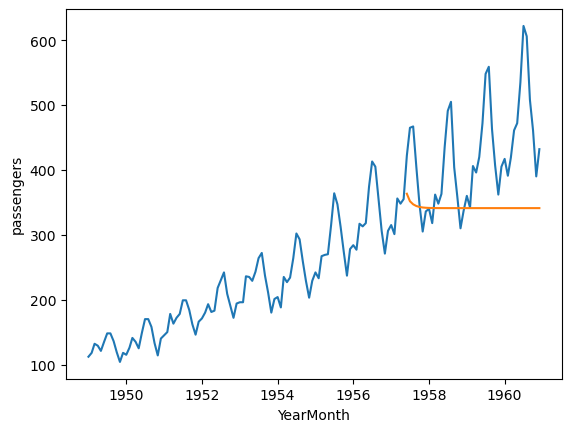

In [131]:
airp.dropna().head()
sns.lineplot(data=airp,x=airp.index,y='passengers')
sns.lineplot(data=airp,x=airp.index,y='prediication')

In [132]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['passengers'],prediaction))

111.11010326020424

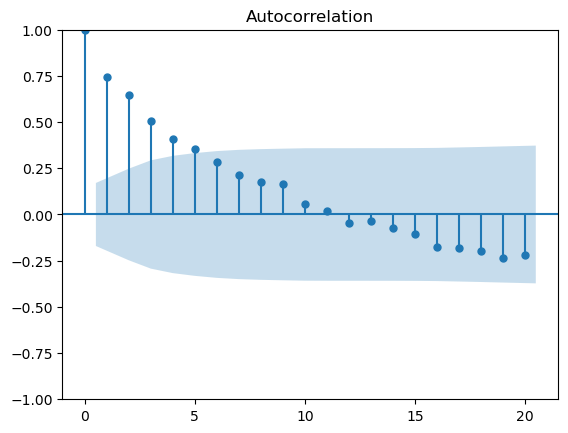

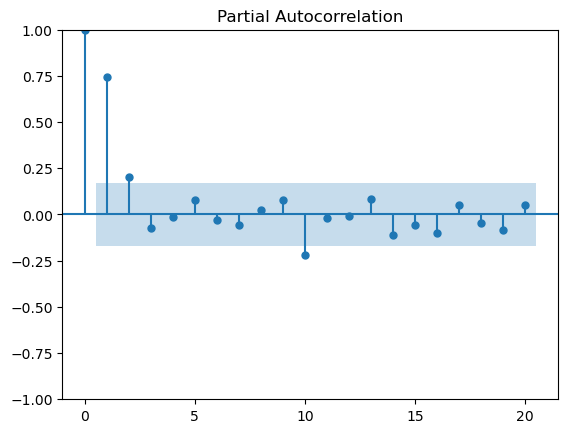

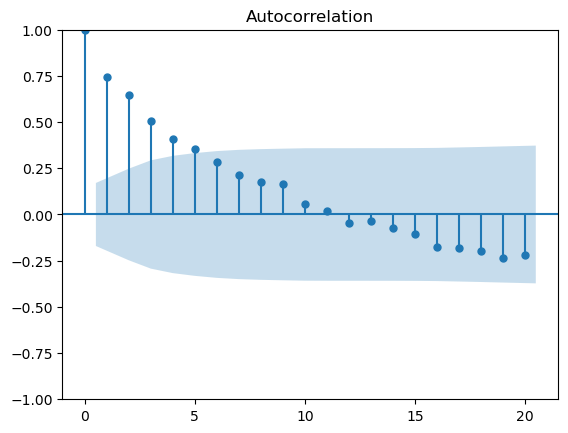

In [150]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
plot_pacf(airp['firstDif2'].dropna(),lags=20)
plot_acf(airp['firstDif2'].dropna(),lags=20)


In [159]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
predication = model_fit.predict(start=test.index[0],end=test.index[-1])
airp['sramaxpredication'] = predication

In [140]:
airp.tail()

,passengers,firstDif,firstDif2,prediication,sramaxpredication
YearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,600.357839
1960-09-01,508,-98.0,45.0,341.111333,535.122092
1960-10-01,461,-47.0,54.0,341.111333,480.192693
1960-11-01,390,-71.0,28.0,341.111333,433.002908
1960-12-01,432,42.0,27.0,341.111333,478.345834


<Axes: xlabel='YearMonth', ylabel='passengers'>

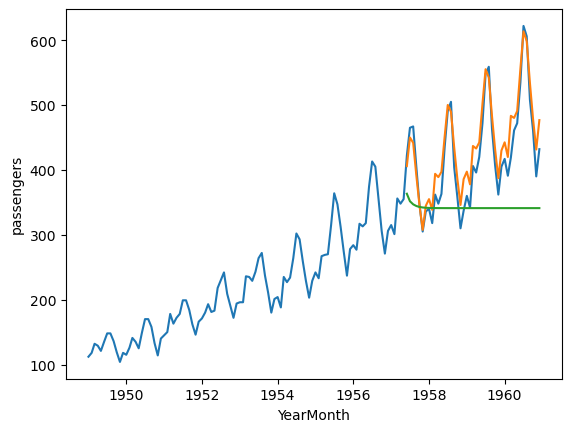

In [161]:
airp.dropna().head()
sns.lineplot(data=airp,x=airp.index,y='passengers')
sns.lineplot(data=airp,x=airp.index,y='sramaxpredication')
sns.lineplot(data=airp,x=airp.index,y='prediication')

In [172]:
futureDate = pd.DataFrame(pd.date_range(start='1960-12-01',end='1962-12-01'),columns=['date'])
futureDate.set_index('date',inplace=True)
futureDate.head()

""
date
1960-12-01
1960-12-02
1960-12-03
1960-12-04
1960-12-05


In [174]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot()

1960-12-01    476.792962
1961-01-01    490.617388
1961-02-01    465.090854
1961-03-01    532.883241
1961-04-01    530.160743
1961-05-01    542.001285
1961-06-01    612.618910
1961-07-01    674.618390
1961-08-01    657.143849
1961-09-01    588.143023
1961-10-01    528.876559
1961-11-01    478.572647
1961-12-01    526.630380
1962-01-01    541.521093
1962-02-01    513.137444
1962-03-01    585.230427
1962-04-01    582.941945
1962-05-01    595.920605
1962-06-01    671.913140
1962-07-01    738.019965
1962-08-01    718.407062
1962-09-01    644.931383
1962-10-01    581.726522
1962-11-01    528.581717
1962-12-01    579.236881
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='YearMonth', ylabel='passengers'>

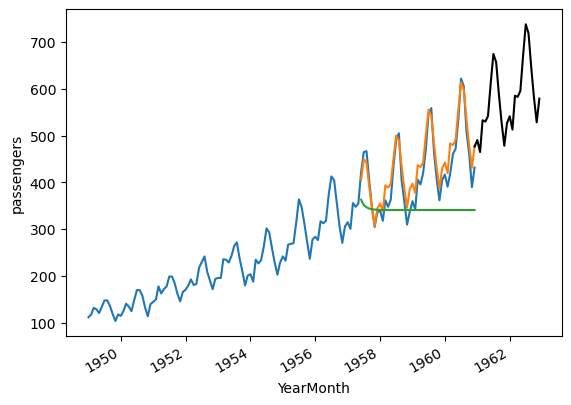

In [176]:
airp.dropna().head()
sns.lineplot(data=airp,x=airp.index,y='passengers')
sns.lineplot(data=airp,x=airp.index,y='sramaxpredication')
sns.lineplot(data=airp,x=airp.index,y='prediication')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')